# IEOR 160 HW 4

## Imports

In [18]:
# Need to have these installed every time i run 
# !pip install cvxpy
# !pip install matplotlib
# !pip install numpy
# !pip install --upgrade pip
# !pip install numdifftools

In [64]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import math
import numdifftools as nd

## Problem 1

In [15]:
#Solution derived using CVX
#initializing the variables to be optimized

def minimum()
x1 = cp.Variable(1)
x2 = cp.Variable(1)
x3 = cp.Variable(1)
#a**x = cp.exp(cp.multiply(np.log(a), x))
term1 = cp.exp(x1 - 1)
term2 = cp.exp(-x1 + 1)
term3 = cp.exp(x2 - 2)
term4 = cp.exp( -x2 + 2)
term5 = cp.exp(x3 - 3)
term6 = cp.exp(-x3 + 3)
term7 = cp.power(x1 + x2 + x3, 4)

objective = term1 + term2 + term3 + term4 + term5 + term6 + term7
problem = cp.Problem(cp.Minimize(objective))
res = problem.solve()
print("x1: {0}\nx2: {1}\nx3: {2}".format(x1.value, x2.value, x3.value))
print("Minimum Value: {0}".format(res))

x1: [-0.64164692]
x2: [0.35835308]
x3: [1.35835307]
Minimum Value: 17.40774602388701


[1.1740990505212814, 1.010934261637063, 0.8579735973514104, 0.7156917382044803, 0.585227138748845, 0.46799190705009863, 0.3652759983786993, 0.277890691863675, 0.2059199254535269, 0.1486363873678922, 0.10459519564508923, 0.07186303194316501, 0.048303633048393024, 0.03183860947397221, 0.020630657833462962, 0.013174531793172406, 0.008310714329754276, 0.005189729490396644, 0.0032141250522492726, 0.00197734743398037, 0.0012099929054301128, 0.0007372879417850697, 0.0004477452762792211, 0.0002711896581129025, 0.00016391098635359924, 9.89070223695876e-05, 5.960421306561159e-05, 3.5881101524637415e-05, 2.158075672120674e-05, 1.2969325220879568e-05]


Text(0.5, 0, 'iteration')

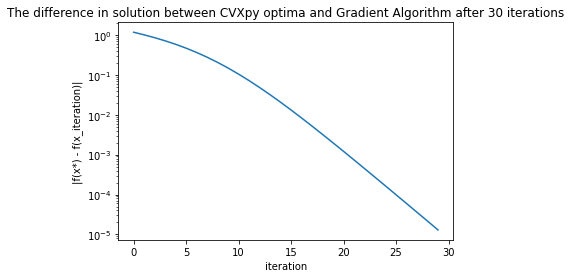

In [77]:
#write a function that handles the 1d case for gradient descent
#write an outer function that will handle the 
#recall the direction is negative gradient for the gradient method

'''
backtracking line search steps:
- fix a parameter beta from 0-1
- start with iteration e = 1
'''
def func(x):
    return (np.exp(x[0] - 1) + np.exp(-x[0] + 1) + np.exp(x[1] - 1) + np.exp(-x[1] + 1)
        + np.exp(x[2] - 1) + np.exp(-x[2] + 1) +  np.power(x[0] + x[1] + x[2], 4))

'''
Initializing variables
'''
delta = 10 ** (-3)
x1, x2, x3 = 0, 0, 0

gradient = nd.Gradient(func)([x1, x2, x3])
direction = -gradient
beta = 0.01
dpoints = []
dpoints.append([x1, x2, x3])

def backtracking(x1, x2, x3, gradient, delta, direction):
    #when the norm is not close enough to delta continue
    while np.linalg.norm(nd.Gradient(func)([x1, x2, x3])) > delta:
        
        #reset alpha/counter, backtracking line search
        alpha = 1
        while ((func([x1, x2, x3] + alpha * direction)) > (func([x1, x2, x3]) + alpha * beta * gradient * direction)[0]):        
            alpha = beta * alpha
        
        gradient = nd.Gradient(func)([x1, x2, x3])
        direction = -gradient
        
        #update points
        x1 = x1 + alpha * direction[0]
        x2 = x2 + alpha * direction[1]
        x3 = x3 + alpha * direction[2]
        dpoints.append([x1, x2, x3])
    return dpoints

dpoints = backtracking(x1, x2, x3, gradient, delta, direction)

diff = []
def draw(dpoints):
    for i in range(30):
        diff.append(abs(func(dpoints[i]) - func(dpoints[-1])))
    print(diff)
    return diff

draw(dpoints)
plt.yscale("log")
plt.plot(diff);
plt.title("The difference in solution between CVXpy optima and Gradient Algorithm after 30 iterations");
plt.ylabel("|f(x*) - f(x_iteration)|");
plt.xlabel("iteration")

In [52]:
#plot for the 3d plot
splitted = list(zip(*pts))
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
# for i in range(len(splitted[0])):
#     ax.quiver(0, 0, 0, splitted[0][i], splitted[1][i], splitted[2][i])
ax.scatter(splitted[0], splitted[1], splitted[2])
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3");

array([4.010312, 4.010312, 4.010312])

In [47]:
(func([x1, x2, x3] + 1 * direction))

2484.3852535790575